# Abalone data age predictive analysis

In [1]:
#pip install xgboost

In [2]:
# Data analysis and wrangling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Machine learning regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
print(df.columns.values)

['Sex' 'Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight' 'Rings']


In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df['Sex'].describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

In [9]:
df[['Sex', 'Rings']].groupby('Sex', as_index=False).mean().sort_values(by='Rings', ascending=False).reset_index(drop=True)

,Sex,Rings
0,F,11.129304
1,M,10.705497
2,I,7.890462


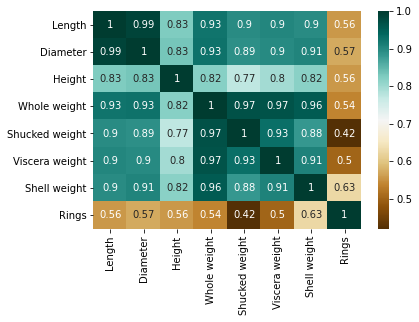

In [10]:
sns.heatmap(df.corr(), cmap='BrBG', annot=True)

In [11]:
sex = {'I':0, 'M':1, 'F':2}

df['Sex'] = df['Sex'].map(sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
#pip install seaborn

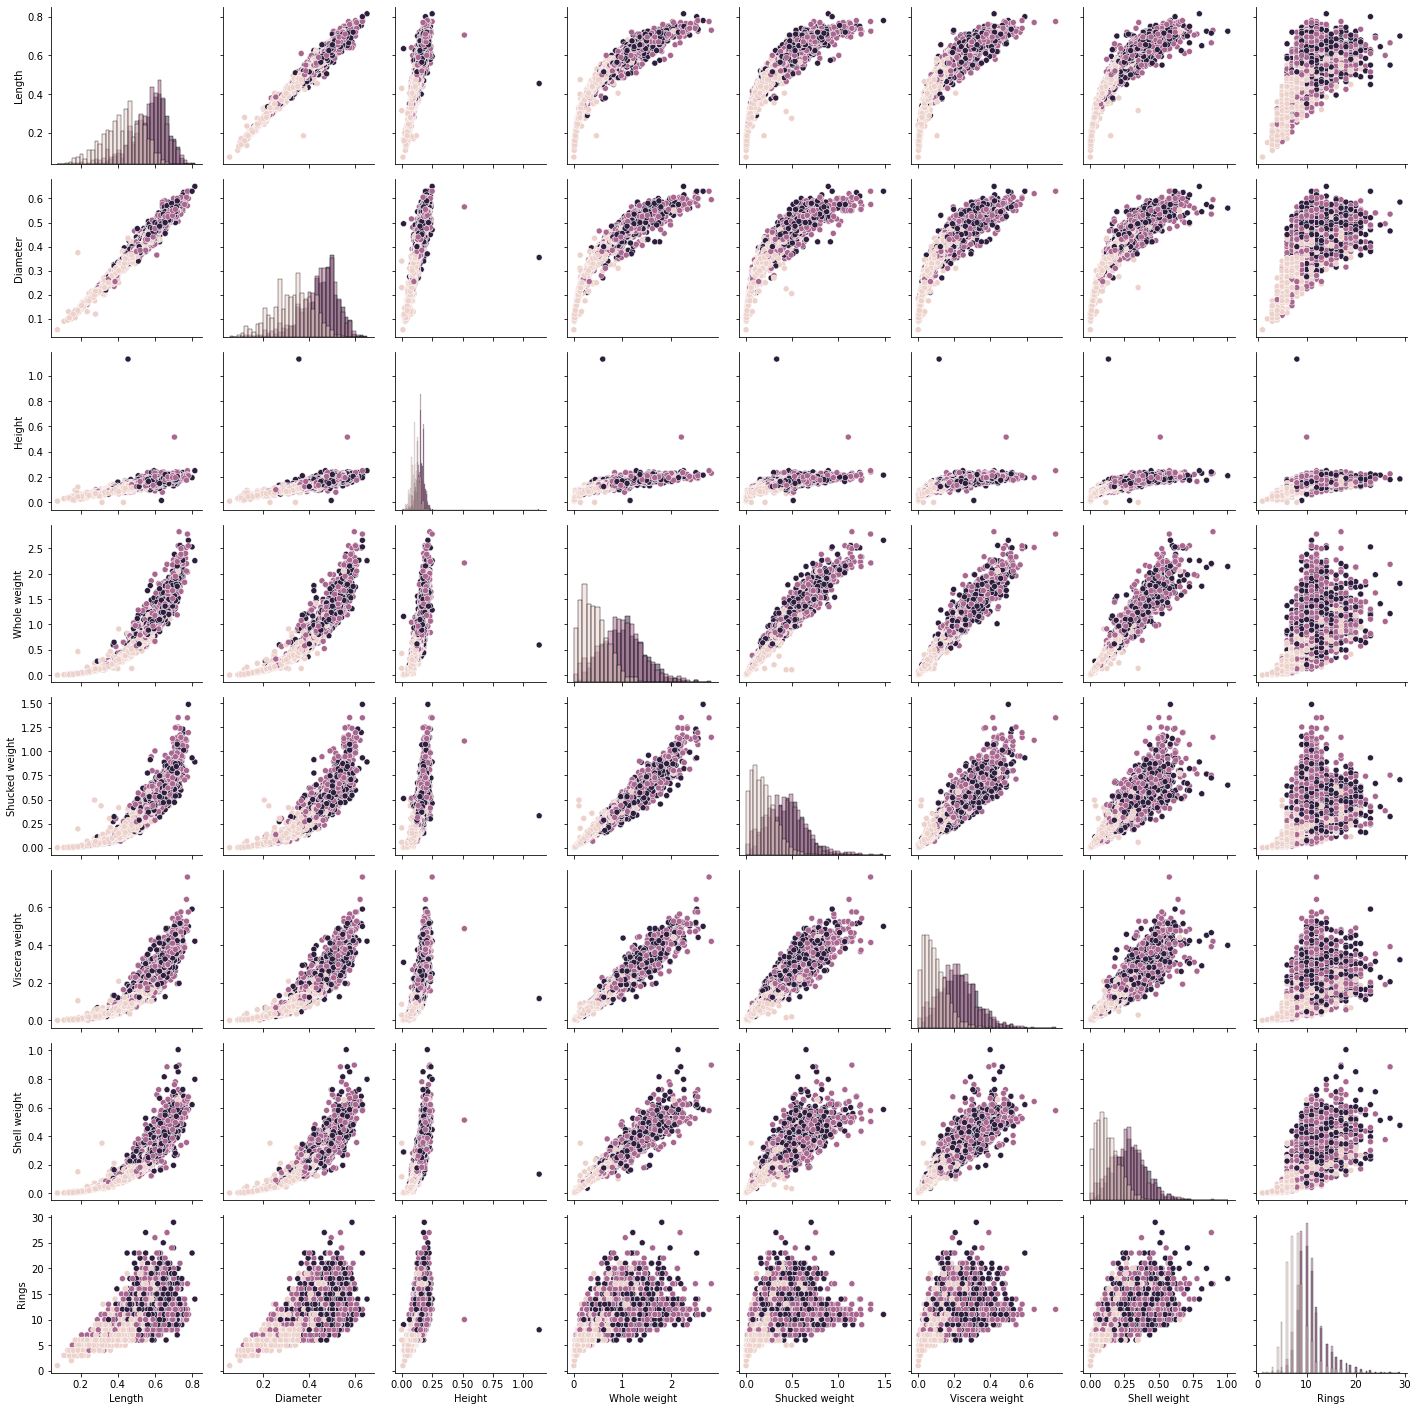

In [13]:
g = sns.PairGrid(df, hue='Sex')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rings'], axis=1)
y = df.Rings

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [26]:
from sklearn.metrics import mean_absolute_error as mae

model_classify = [LogisticRegression, SVC, LinearSVC, RandomForestClassifier, KNeighborsClassifier, GaussianNB, Perceptron, SGDClassifier, DecisionTreeClassifier]
model_reg = [RandomForestRegressor, SVR, DecisionTreeRegressor, XGBRegressor]


preds_classify = []
preds_reg = []

for model in model_reg:
    m = model()
    m.fit(X_train, y_train)
    preds = m.predict(X_valid)
    preds_reg.append(preds)
    print(mae(y_valid, preds))
    
for model in model_classify:
    m = model()
    m.fit(X_train, y_train)
    preds = m.predict(X_valid)
    preds_classify.append(preds)
    print(mae(y_valid, preds))


1.5313995215311005
1.5429300928314948
2.074162679425837
1.5984859594888094


C:\Users\baliy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.7834928229665072
1.8528708133971292
1.735645933014354
1.6507177033492824
1.8504784688995215
1.979665071770335
7.053827751196172
2.199760765550239
1.9270334928229664
